In [ ]:
from algorithm import *
import pandas as pd
import numpy as np

### Swiss NSF Intervals

In [2]:
# load Swiss NSF data from csv 
df = pd.read_csv('SwissNSFData/intervals.csv')
df.sort_values(by='m', ascending=True, inplace=True) # lower is better for Swiss NSF (ranked by expectd rank)
df.reset_index(drop=True, inplace=True)
n = df.shape[0]
intervals = list(zip(n - df['h'], n - df['l'])) # make list of intervals, l = n - ER, h = n ER using using 50% CI
intervals90 = list(zip(n - df['hh'], n - df['ll'])) # make list of intervals, l = n - ER, h = n ER using 90% CI
x = list(n - df['m'])

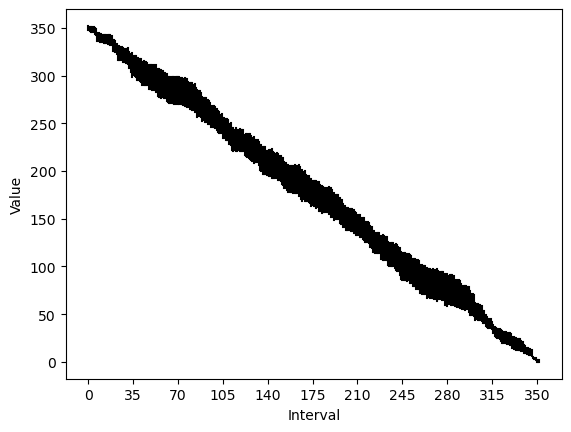

In [3]:
plot_intervals(intervals)
plt.show()

Accept 89 intervals
Reject 223 intervals
Remaining 41 intervals
Number of partitions: 1
Number of partitions pruned: 1


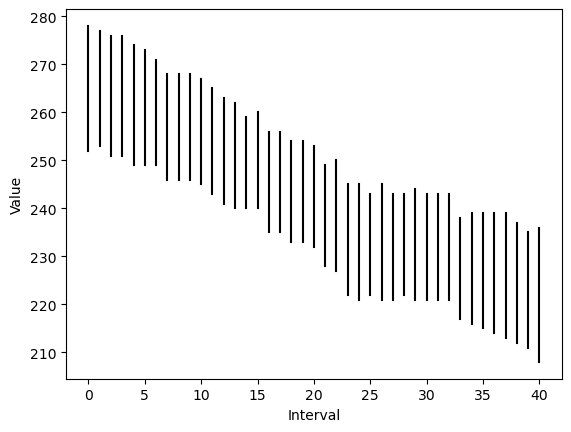

In [ ]:
k = 106
pruned, top, bottom = prune_instance(intervals, k)
pruned_intervals = [intervals[i] for i in pruned]
print("Accept {} intervals".format(len(top)))
print("Reject {} intervals".format(len(bottom)))
print("Remaining {} intervals".format(len(pruned)))
n_partitions = len(partition_intervals(intervals))
n_partitions_pruned = len(partition_intervals(pruned_intervals))
print("Number of partitions: {}".format(n_partitions))
print("Number of partitions pruned: {}".format(n_partitions_pruned))
# plot pruned intervals
plot_intervals(pruned_intervals)
plt.show()

Accept 100 intervals
Reject 241 intervals
Remaining 12 intervals
Number of partitions: 2
Number of partitions pruned: 1


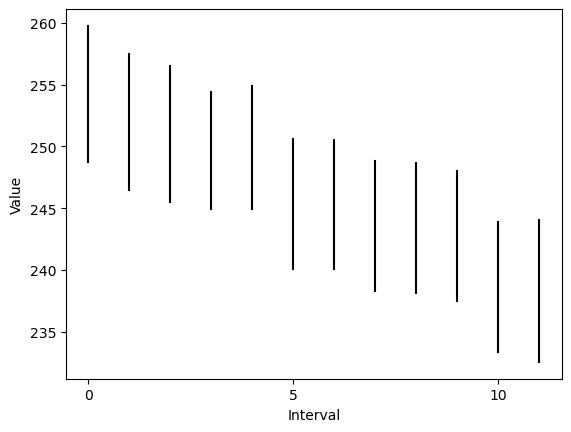

In [15]:
# half the width of the intervals 
half_intervals = [(x[i] - (x[i]-l)/2, x[i] + (h - x[i]) / 2) for i, (l,h) in enumerate(intervals)]
pruned, top, bottom = prune_instance(half_intervals, k)
pruned_intervals = [half_intervals[i] for i in pruned]
print("Accept {} intervals".format(len(top)))
print("Reject {} intervals".format(len(bottom)))
print("Remaining {} intervals".format(len(pruned)))
n_partitions = len(partition_intervals(intervals))
n_partitions_pruned = len(partition_intervals(pruned_intervals))
print("Number of partitions: {}".format(n_partitions))
print("Number of partitions pruned: {}".format(n_partitions_pruned))
# plot pruned intervals
plot_intervals(pruned_intervals)
plt.show()

Accept 38 intervals
Reject 183 intervals
Remaining 132 intervals
Number of partitions: 2
Number of partitions pruned: 1


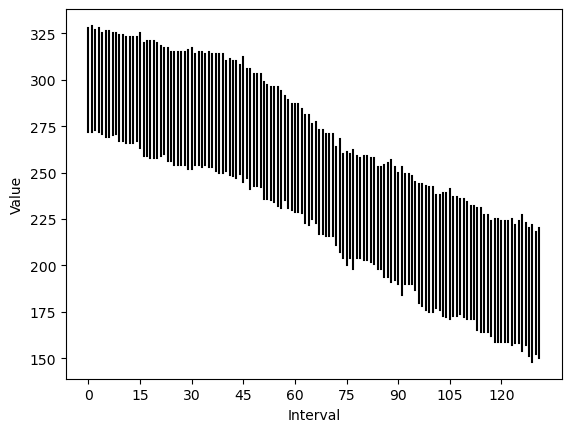

In [ ]:
# Use 90% CIs instead of 50% CIs
pruned, top, bottom = prune_instance(intervals90, k)
pruned_intervals = [intervals90[i] for i in pruned]
print("Accept {} intervals".format(len(top)))
print("Reject {} intervals".format(len(bottom)))
print("Remaining {} intervals".format(len(pruned)))
n_partitions = len(partition_intervals(intervals))
n_partitions_pruned = len(partition_intervals(pruned_intervals))
print("Number of partitions: {}".format(n_partitions))
print("Number of partitions pruned: {}".format(n_partitions_pruned))
# plot pruned intervals
plot_intervals(pruned_intervals)
plt.show()

### NeurIPS 2024 (Min-Max Review Score Intervals)

In [39]:
df = pd.read_csv('ConferenceReviewData/neurips2024_data/neurips2024_reviews.csv')
df = df[df.decision != 'Reject'].reset_index(drop=True)
ratings = df.groupby('paper_id').agg({'rating': ['max', 'mean', 'min', 'count'], 'decision': 'max'}).reset_index()
ratings.columns = ['paper_id', 'rating_max', 'rating_mean', 'rating_min', 'num_reviews', 'decision']
# rename Accept (poster) to Poster and Accept (oral) or Accept (spotlight) to Spotlight/Oral
ratings['decision'] = ratings['decision'].replace({'Accept (poster)': 'Poster', 'Accept (oral)': 'Spotlight/Oral', 'Accept (spotlight)': 'Spotlight/Oral'})
ratings['decision'].value_counts()

decision
Poster            3648
Spotlight/Oral     387
Name: count, dtype: int64

In [40]:
intervals = list(zip(ratings['rating_min'], ratings['rating_max']))
x = list(ratings['rating_mean'])
decisions = ratings['decision']

In [41]:
k = 387

In [43]:
pruned, top, bottom = prune_instance(intervals, k)
pruned_intervals = [intervals[i] for i in pruned]
print("Accept {} intervals".format(len(top)))
print("Reject {} intervals".format(len(bottom)))
print("Remaining {} intervals".format(len(pruned)))
n_partitions = len(partition_intervals(intervals))
n_partitions_pruned = len(partition_intervals(pruned_intervals))
print("Number of partitions: {}".format(n_partitions))
print("Number of partitions pruned: {}".format(n_partitions_pruned))

Accept 0 intervals
Reject 71 intervals
Remaining 3964 intervals
Number of partitions: 3
Number of partitions pruned: 2


### NeurIPS 2024 ("Bootstrapped" Intervals)

In [44]:
df = pd.read_csv('ConferenceReviewData/neurips2024_data/neurips2024_reviews.csv')
df = df[df.decision != 'Reject'].reset_index(drop=True)
ratings = df.groupby('paper_id').agg({'rating': list, 'decision': 'max'}).reset_index()
ratings['decision'] = ratings['decision'].replace({'Accept (poster)': 'Poster', 'Accept (oral)': 'Spotlight/Oral', 'Accept (spotlight)': 'Spotlight/Oral'})

In [45]:
def get_interval(lst):
    means = []
    for i in range(len(lst)):
        temp_lst = lst[:i] + lst[i+1:]
        mean = 1. * sum(temp_lst) / len(temp_lst)
        means.append(mean)
    return min(means), max(means)

In [46]:
intervals = ratings['rating'].apply(get_interval)
x = ratings['rating'].apply(np.mean)
decision = ratings['decision']

In [47]:
pruned, top, bottom = prune_instance(intervals, k)
pruned_intervals = [intervals[i] for i in pruned]
print("Accept {} intervals".format(len(top)))
print("Reject {} intervals".format(len(bottom)))
print("Remaining {} intervals".format(len(pruned)))
n_partitions = len(partition_intervals(intervals))
n_partitions_pruned = len(partition_intervals(pruned_intervals))
print("Number of partitions: {}".format(n_partitions))
print("Number of partitions pruned: {}".format(n_partitions_pruned))

Accept 21 intervals
Reject 2396 intervals
Remaining 1618 intervals
Number of partitions: 9
Number of partitions pruned: 2


## Compare Approaches

In [7]:
k = 106
T = k

In [8]:
p_swiss = swiss_nsf(intervals, means, k)

NameError: name 'means' is not defined

In [46]:
def summarize_p(p):
    # Num accepted
    p_round = np.round(p, 2)
    num_accepted = np.sum(p_round == 1)
    num_rejected = np.sum(p_round == 0)
    print(f"Accepted: {num_accepted} intervals")
    print(f"Randomized: {len(p) - (num_accepted + num_rejected)} intervals")
    print(f"Rejected: {num_rejected} intervals")

    print("")

    p_counts = np.unique(p_round, return_counts=True)
    # print count of each p_i in decreasing order of p_i
    for i in list(range(len(p_counts[0])))[::-1]:
        print(f"p = {p_counts[0][i]}: {p_counts[1][i]} intervals")
        

In [47]:
summarize_p(p_swiss)

Accepted: 93 intervals
Randomized: 25 intervals
Rejected: 234 intervals

p = 1.0: 93 intervals
p = 0.52: 25 intervals
p = 0.0: 234 intervals


In [48]:
v, p = solve_instance_ordered([(l/2., u/2.) for (l,u) in intervals], T, k, list(range(n)), lex_order_p=1)

Pruned 303 intervals. Solving with n=49, k=22.
Solving with 120 constraints.
Solved for lexicographic ordering on p.
Solved with optimal value: 13.732057416178245 out of 22.


In [49]:
summarize_p(p=p)

Accepted: 95 intervals
Randomized: 28 intervals
Rejected: 229 intervals

p = 1.0: 95 intervals
p = 0.96: 2 intervals
p = 0.53: 1 intervals
p = 0.48: 17 intervals
p = 0.05: 6 intervals
p = 0.01: 2 intervals
p = 0.0: 229 intervals


In [50]:
pct_swiss = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals],p_swiss, k) / T, 3)
pct_opt = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals], p, k) / T, 3)
pct_topk = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals],[1]*k+[0]*(n-k), k) / T, 3)

print("Proportion of top-k intervls selected in worst case:")
print(f"Optimal: {pct_opt}")
print(f"Swiss: {pct_swiss}")
print(f"Top-k: {pct_topk}")

Proportion of top-k intervls selected in worst case:
Optimal: 0.922
Swiss: 0.907
Top-k: 0.887


In [51]:
k = 53
T = k

In [52]:
p_swiss = swiss_nsf(intervals, means, k)
v, p = solve_instance_ordered([(l/2., u/2.) for (l,u) in intervals], T, k, list(range(n)), lex_order_p=1)

Pruned 324 intervals. Solving with n=28, k=13.
Solving with 69 constraints.
Solved for lexicographic ordering on p.
Solved with optimal value: 8.239999998817677 out of 13.


In [53]:
summarize_p(p_swiss)

Accepted: 45 intervals
Randomized: 14 intervals
Rejected: 293 intervals

p = 1.0: 45 intervals
p = 0.57: 14 intervals
p = 0.0: 293 intervals


In [54]:
summarize_p(p)

Accepted: 44 intervals
Randomized: 18 intervals
Rejected: 290 intervals

p = 1.0: 44 intervals
p = 0.97: 1 intervals
p = 0.94: 1 intervals
p = 0.93: 1 intervals
p = 0.92: 1 intervals
p = 0.48: 9 intervals
p = 0.44: 2 intervals
p = 0.02: 1 intervals
p = 0.01: 2 intervals
p = 0.0: 290 intervals


In [55]:
pct_swiss = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals],p_swiss, k) / T, 3)
pct_opt = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals], p, k) / T, 3)
pct_topk = np.round(evaluate_p([(l/2., u/2.) for (l,u) in intervals],[1]*k+[0]*(n-k), k) / T, 3)

print("Proportion of top-k intervls selected in worst case:")
print(f"Optimal: {pct_opt}")
print(f"Swiss: {pct_swiss}")
print(f"Top-k: {pct_topk}")

Proportion of top-k intervls selected in worst case:
Optimal: 0.91
Swiss: 0.892
Top-k: 0.868


## Check Monotonicity in k

In [12]:
# check monotonoicity of swiss_nsf
p_swiss_prev = swiss_nsf(intervals, means, 1)

for k in range(2,200):
    p_swiss = swiss_nsf(intervals, means, k)
    if np.any(p_swiss_prev > p_swiss):
        print(f"Swiss NSF is not monotonic for k={k}")
        break
    p_swiss_prev = p_swiss

Swiss NSF is not monotonic for k=83


In [13]:
summarize_p(swiss_nsf(intervals, means, 82))

p = 1.0: 72 intervals
p = 0.53: 19 intervals
p = 0.0: 261 intervals


In [14]:
summarize_p(swiss_nsf(intervals, means, 83))

p = 1.0: 72 intervals
p = 0.52: 21 intervals
p = 0.0: 259 intervals


In [15]:
# check monotonoicity of our method with k=T
p_opt_prev = solve_instance_ordered(intervals, 1, 1, list(range(n)), lex_order_p=1, verbose=False)[1]

for k in range(2,200):
    p_opt = solve_instance_ordered(intervals, k, k, list(range(n)), lex_order_p=1, verbose=False)[1]
    if np.any(p_opt_prev > p_opt):
        print(f"Our method with T=k is not monotonic for k={k}")
        break
    p_opt_prev = p_opt

Our method with T=k is not monotonic for k=3


In [16]:
summarize_p(p_opt_prev)

p = 0.49: 1 intervals
p = 0.33: 4 intervals
p = 0.17: 1 intervals
p = 0.0: 346 intervals


In [17]:
summarize_p(p_opt)

p = 1.0: 1 intervals
p = 0.5: 4 intervals
p = 0.0: 347 intervals


In [22]:
# check monotonoicity of our method with T constant 
T=106

p_opt_prev = solve_instance_ordered(intervals, T, 1, list(range(n)), lex_order_p=-1, verbose=False)[1]

for k in range(2,200):
    p_opt = solve_instance_ordered(intervals, T, k, list(range(n)), lex_order_p=-1, verbose=False)[1]
    if np.any(p_opt_prev > p_opt):
        print(f"Our method with T=k is not monotonic for k={k}")
        break
    p_opt_prev = p_opt

Our method with T=k is not monotonic for k=87


In [23]:
summarize_p(p_opt)

p = 1.0: 84 intervals
p = 0.67: 1 intervals
p = 0.48: 1 intervals
p = 0.21: 2 intervals
p = 0.15: 1 intervals
p = 0.12: 1 intervals
p = 0.11: 4 intervals
p = 0.05: 13 intervals
p = 0.02: 1 intervals
p = 0.0: 244 intervals


In [24]:
summarize_p(p_opt_prev)

p = 1.0: 84 intervals
p = 0.45: 1 intervals
p = 0.32: 1 intervals
p = 0.14: 2 intervals
p = 0.1: 1 intervals
p = 0.08: 1 intervals
p = 0.07: 4 intervals
p = 0.04: 13 intervals
p = 0.01: 1 intervals
p = 0.0: 244 intervals
